In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import scipy.stats as st



In [2]:
path_to_file = '/Users/mac/Desktop/Workshop1/water_potability.csv'
source_df = pd.read_csv(path_to_file, engine='python')

source_df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
def mean_amount_by_clients(df):
    df_clients = df.groupby('cl_id', as_index=False).agg({"amount": "mean"})
   # Sort in descending order
    df_clients = df_clients.sort_values('amount', ascending=False)

    return df_clients

In [4]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
source_df.isnull().sum()
source_df['Potability'].unique()
source_df['Potability'].value_counts()
source_df.isna().mean() * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

<AxesSubplot:ylabel='Potability'>

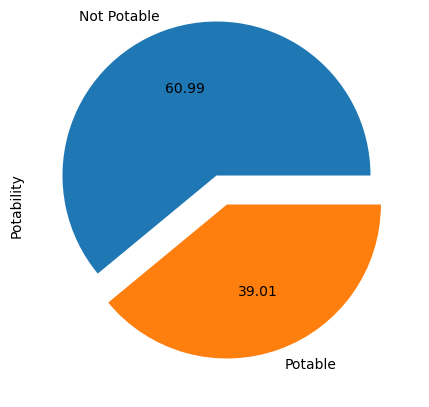

In [7]:
plt.figure(figsize = (15,5))
my_explode = [0.2,0]
my_labels = ['Not Potable', 'Potable']
source_df['Potability'].value_counts().plot(kind = 'pie',autopct = '%.2f',explode= my_explode, labels = my_labels)

In [8]:
# Filling missing values 
features = source_df.copy()
features['ph'].fillna(features['ph'].median(),inplace = True)
features['Sulfate'].fillna(features['Sulfate'].median(),inplace = True)
features['Trihalomethanes'].fillna(features['Trihalomethanes'].median(),inplace = True)
features.drop(columns = ['Potability'],inplace = True)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


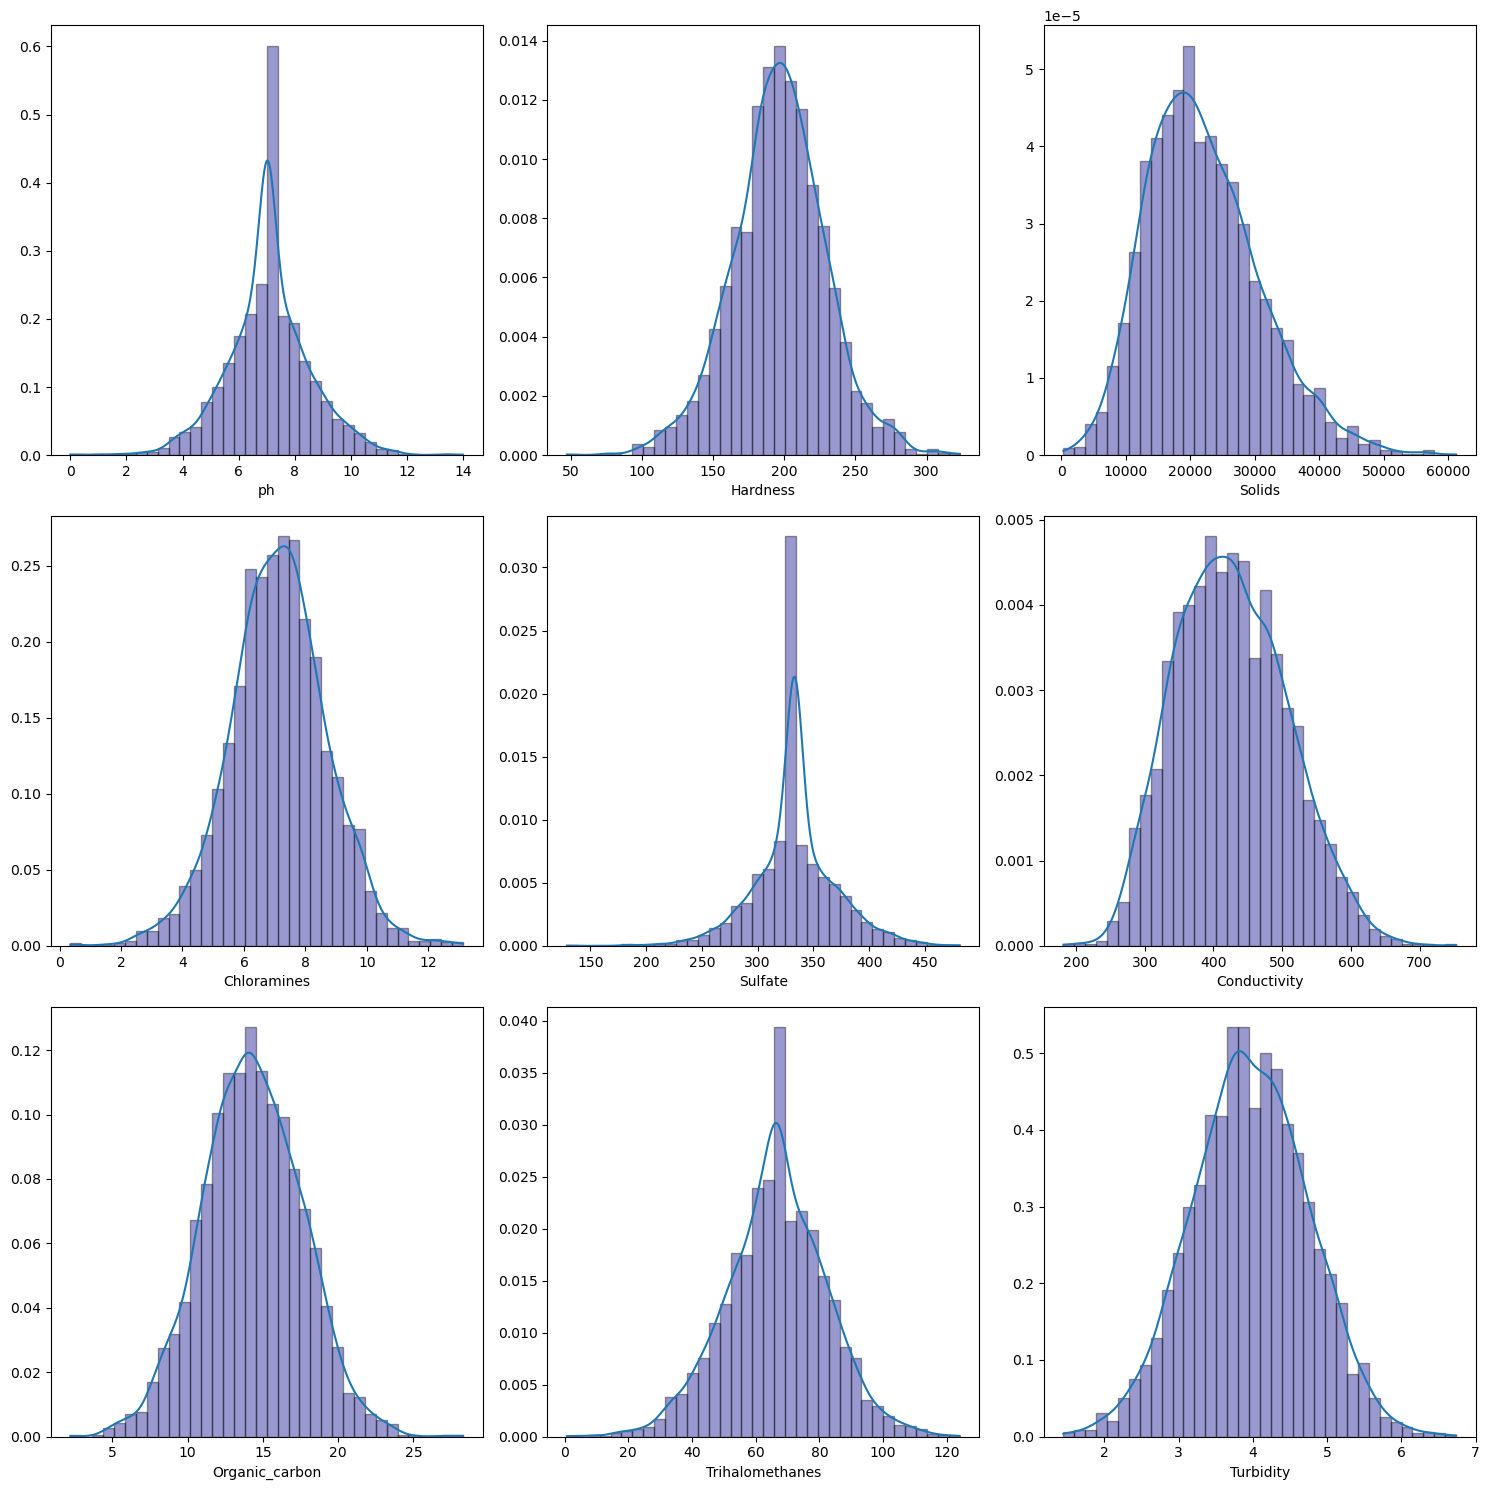

In [9]:
j=1
plt.figure(figsize = (15,15))
for i in features.columns:
    kernel = scipy.stats.gaussian_kde(features[i])
    min_amount, max_amount = features[i].min(), features[i].max()
    x = np.linspace(min_amount, max_amount, len(features[i]))
    kde_values = kernel(x)
    
    plt.subplot(3,3,j)
    sns.distplot(features[i], norm_hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    plt.plot(x, kde_values)
    j=j+1

plt.tight_layout()

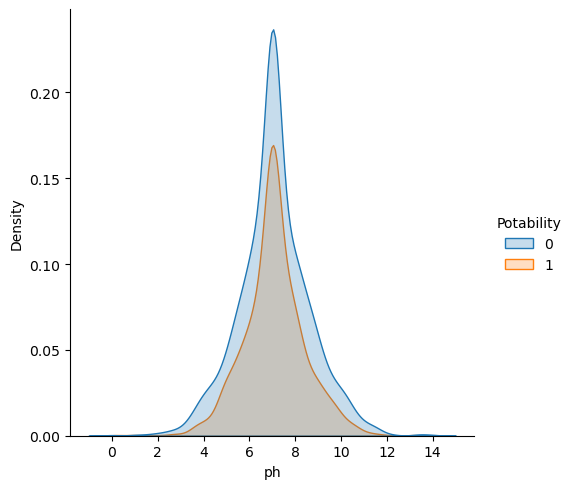

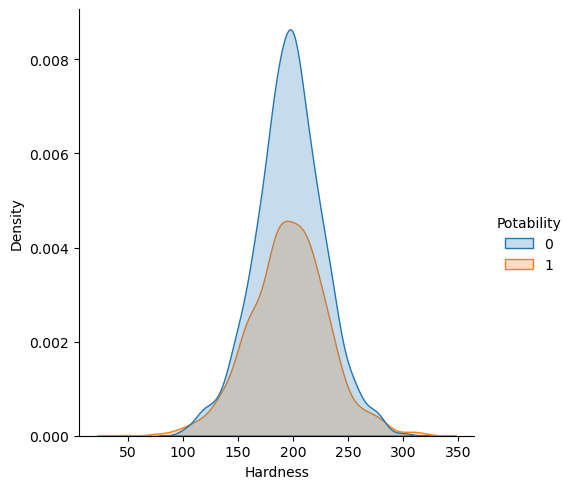

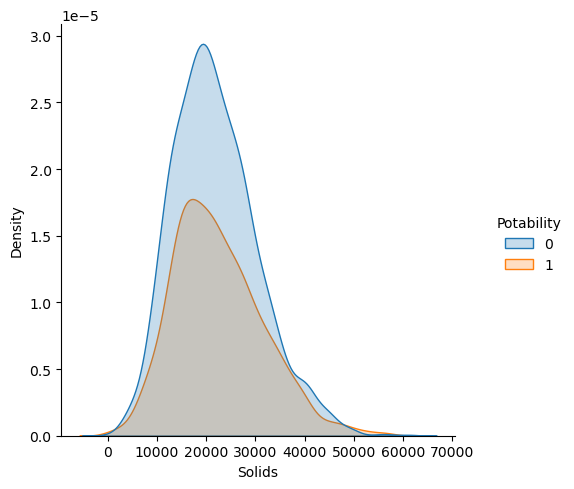

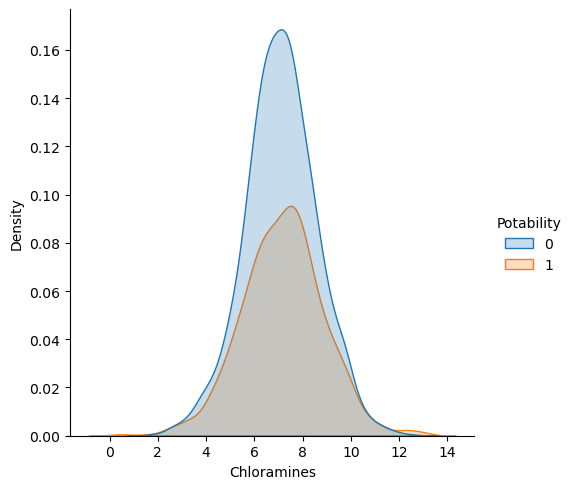

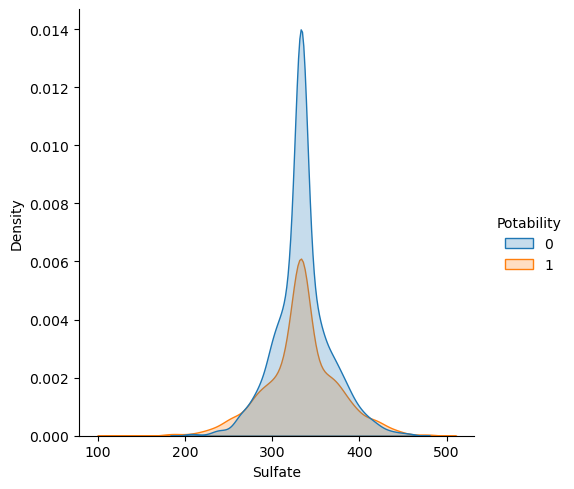

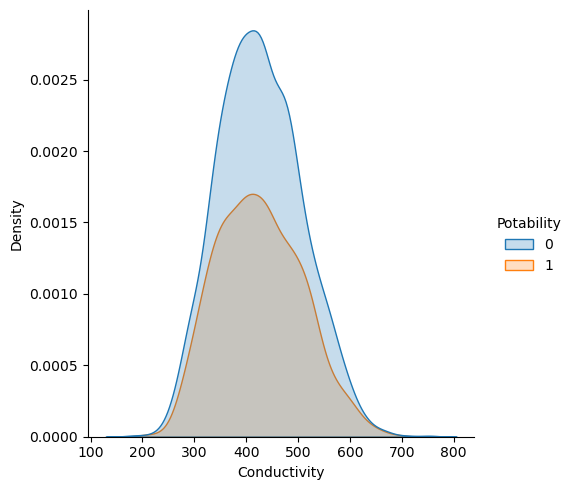

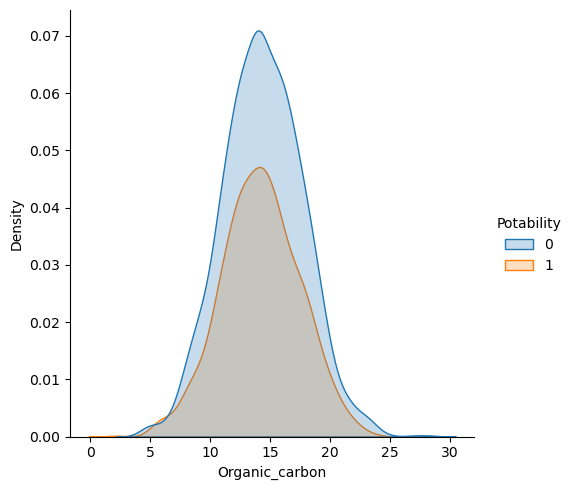

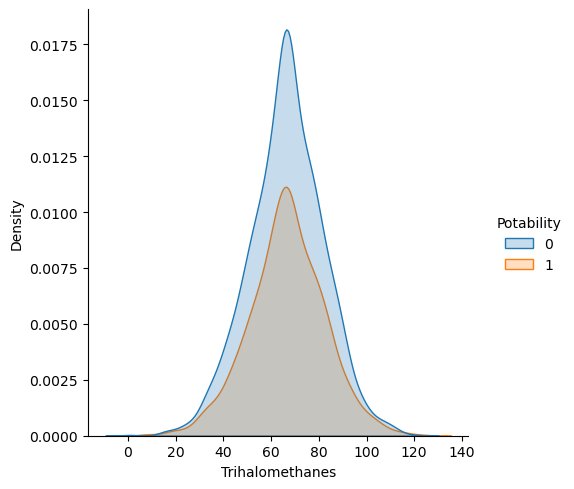

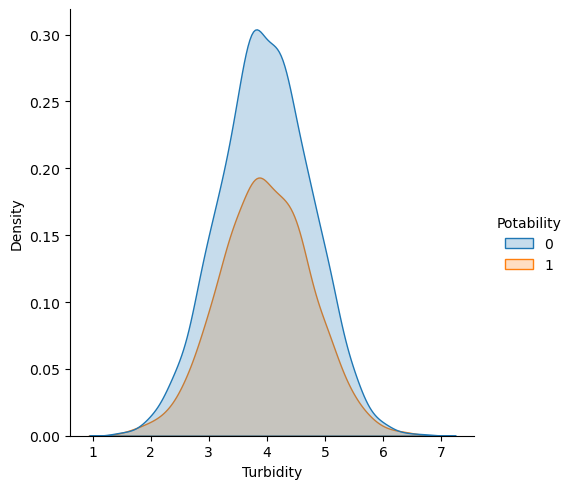

In [10]:
for i in features.columns:
    sns.displot(x=features[i],hue=source_df['Potability'],kind='kde',fill=True)

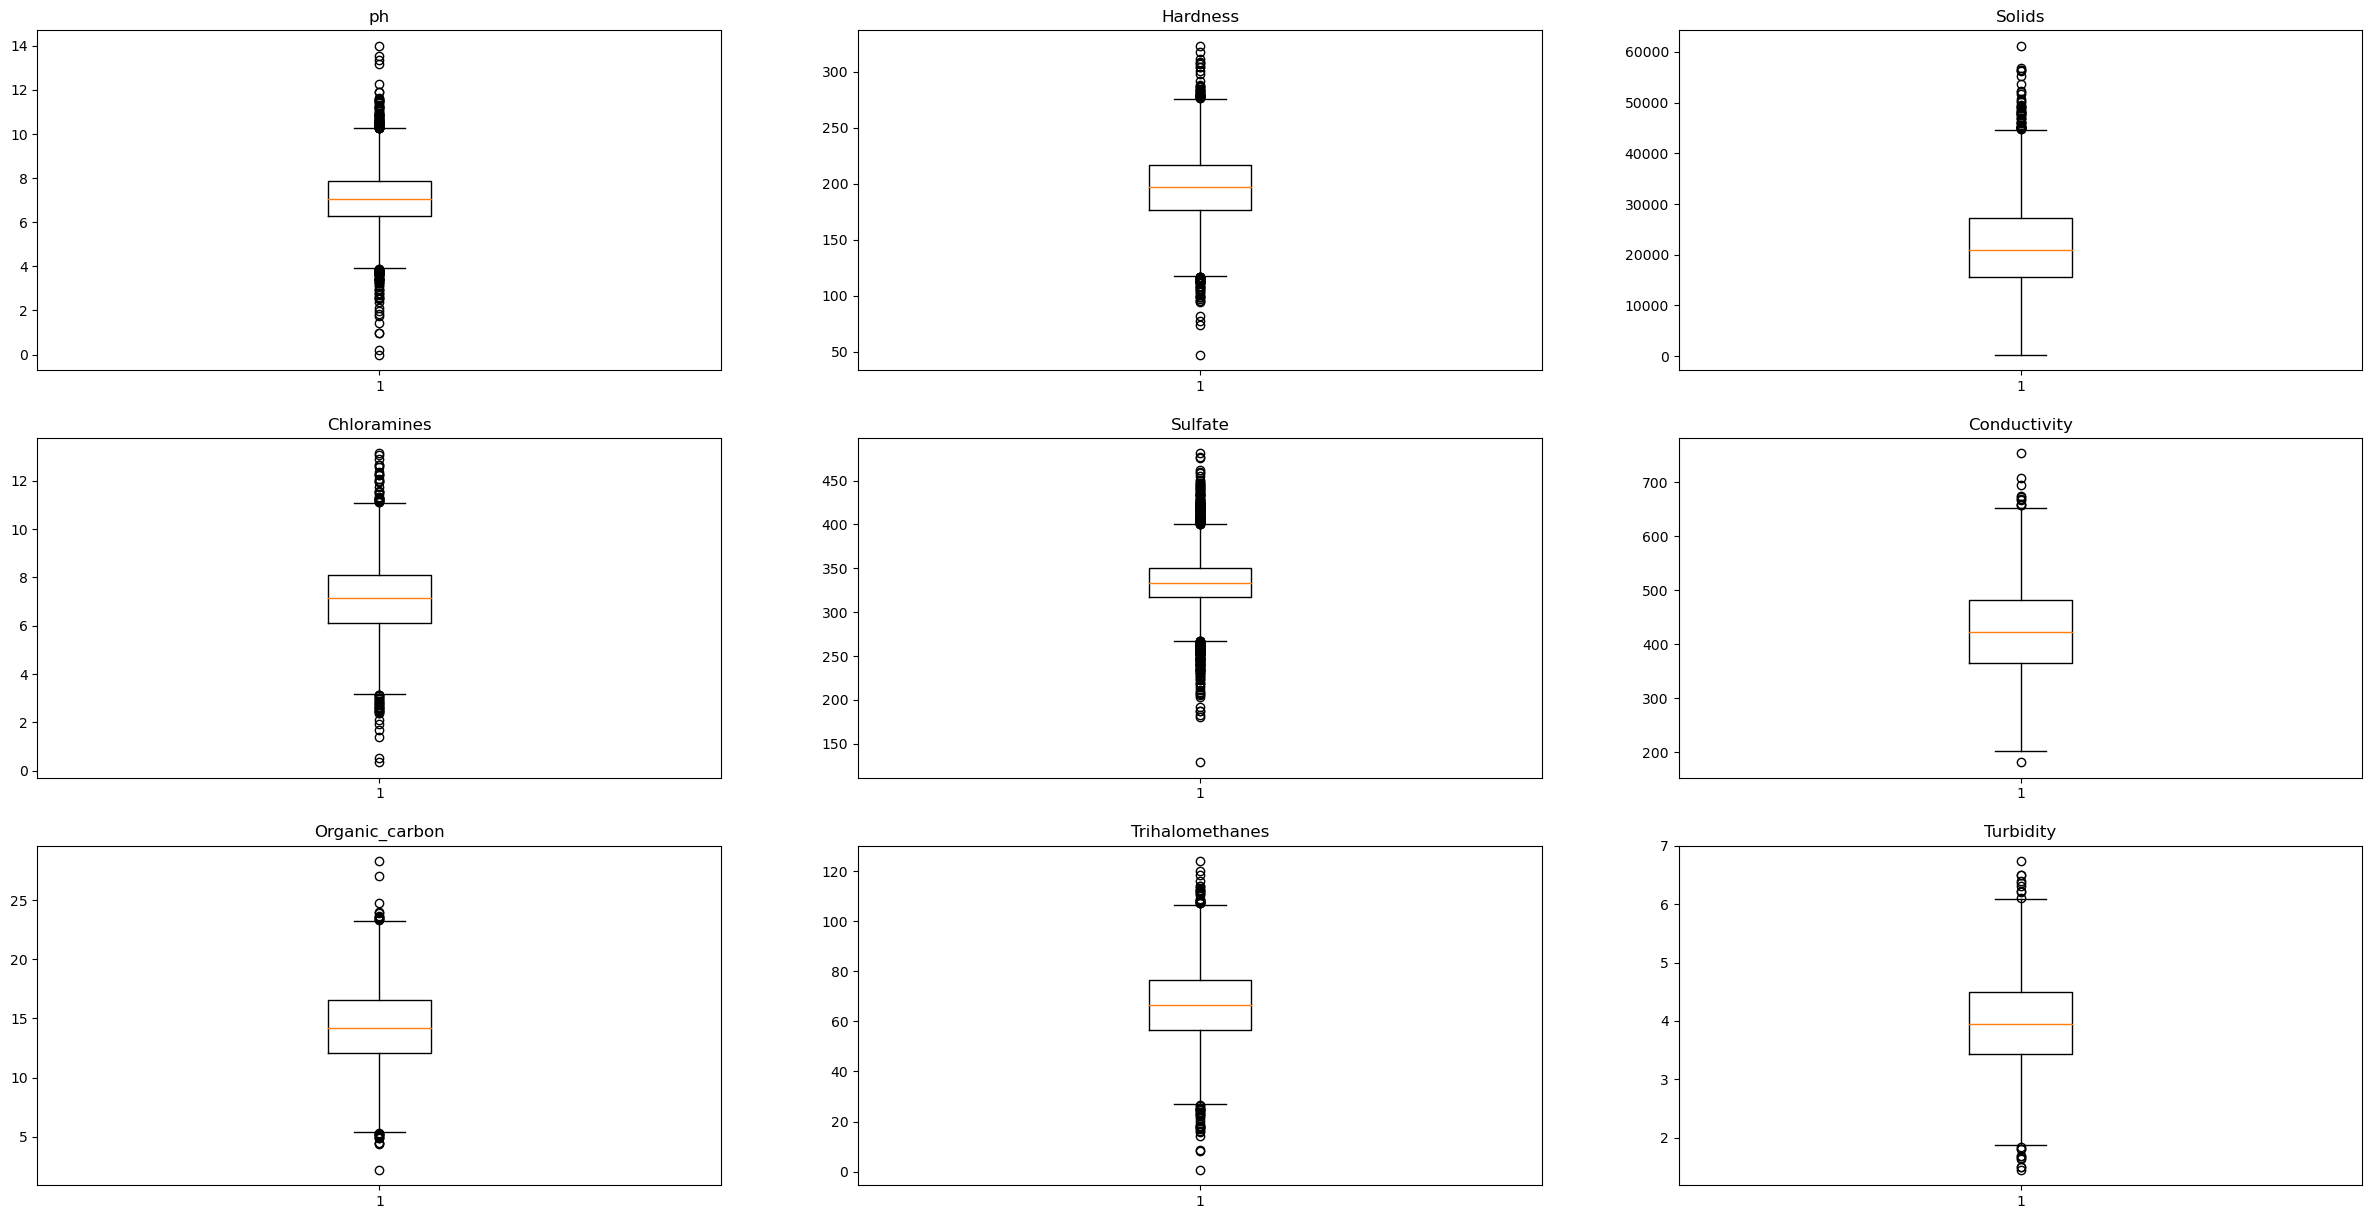

In [11]:
fig, axs = plt.subplots(3,3, figsize=(30,15))
i=0
parameters=[]
for ax in axs.ravel():
    
    col=features[features.columns[i]].to_numpy()    
    bp=ax.boxplot(col)
    ax.set_title(features.columns[i])
    i+=1
   
                            

In [23]:
for i in features.columns:
    print(features[i].describe())
    print()

count    3276.000000
mean        7.074194
std         1.470040
min         0.000000
25%         6.277673
50%         7.036752
75%         7.870050
max        14.000000
Name: ph, dtype: float64

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: Chloramines, dtype: float64

count    3276.000000
mean      333.608364
std        36.143851
min       129.000000
25%       317.094638
50%       333.073546
75%       350.385756
max       481.030642
Name: Sulfate, dtype: float64

In [ ]:
from scipy.stats import norm
from scipy.stats import exponweib
from scipy.stats import t
from scipy.stats import laplace
from scipy.stats import kstwobign


In [ ]:
def norm_params_ls(data, bins=25):
    min_val, max_val = data.min(), data.max()
    hist, _ = np.histogram(data, bins=bins, density=True)
    xdata = np.linspace(min_val, max_val, num=bins)
    
    par, _ = scipy.optimize.curve_fit(norm.pdf, xdata, hist,\
                                    p0=list(norm.fit(data)),\
                                    maxfev=1000)
    
    return par

def laplace_ls(data, bins=25):
    min_val, max_val = data.min(), data.max()
    hist, _ = np.histogram(data, bins=bins, density=True)
    xdata = np.linspace(min_val, max_val, num=bins)
    
    par, _ = scipy.optimize.curve_fit(laplace.pdf, xdata, hist,\
                                    p0=list(laplace.fit(data)),\
                                    maxfev=1000)
    
    return par


def t_params_ls(data, bins=25):
    min_val, max_val = data.min(), data.max()
    hist, _ = np.histogram(data, bins=bins, density=True)
    xdata = np.linspace(min_val, max_val, num=bins)
    
    par, _ = scipy.optimize.curve_fit(t.pdf, xdata, hist,\
                                    p0=list(t.fit(data)),\
                                    maxfev=1000)
    
    return par


def exponweib_ls(data, bins=25):
    min_val, max_val = data.min(), data.max()
    hist, _ = np.histogram(data, bins=bins, density=True)
    xdata = np.linspace(min_val, max_val, num=bins)
    
    par, _ = scipy.optimize.curve_fit(exponweib.pdf, xdata, hist,\
                                    p0=list(exponweib.fit(data, f0=10)),\
                                    maxfev=1000)
    
    return par
def kstwobign_ls(data, bins=25):
    min_val, max_val = data.min(), data.max()
    hist, _ = np.histogram(data, bins=bins, density=True)
    xdata = np.linspace(min_val, max_val, num=bins)
    
    par, _ = scipy.optimize.curve_fit(kstwobign.pdf, xdata, hist,\
                                    p0=list(kstwobign.fit(data)),\
                                    maxfev=1000)
    
    return par

In [ ]:
source_df = source_df.dropna()
def looking_for_best_fit(var):
    var = var
    plt.figure(figsize=(10, 8))
    plt.title(var)
    sns.histplot(source_df[var], kde=False, bins=25, stat='density')
    x = np.linspace(np.min(source_df[var]), np.max(source_df[var]))

    plt.plot(x, norm.pdf(x, *norm.fit(source_df[var])), 'r--', label="Normal MM")

    plt.plot(x, norm.pdf(x,*norm_params_ls(source_df[var])), 'y--', label="Normal LS")

    plt.plot(x, exponweib.pdf(x, *exponweib.fit(source_df[var], f0=15)),'b--', label='Exponentiated Weibull MM')

    plt.plot(x, exponweib.pdf(x, *exponweib_ls(source_df[var])), 'g--', label='Exponentiated Weibull LS')

    plt.plot(x, t.pdf(x, *t.fit(source_df[var])), 'k--', label='t-student MM')

    plt.plot(x, t.pdf(x, *t_params_ls(source_df[var])), 'c--', label='t-student LS')

    plt.plot(x, laplace.pdf(x, *laplace.fit(source_df[var])), lw=2 ,label='laplace MM')

    plt.plot(x, laplace.pdf(x, *laplace_ls(source_df[var])), label='laplace LS')

    plt.plot(x, kstwobign.pdf(x, *kstwobign.fit(source_df[var])),lw=2, label='kstwobign MM')

    plt.plot(x, kstwobign.pdf(x, *kstwobign_ls(source_df[var])),lw=2, label='kstwobign LS')


    plt.legend()

In [ ]:

def find_best_fit(var):
    var = var
    ks_test_name = ['norm_mm','norm_ls','student_mm','student_ls','Weibull_mm','Weibull_ls','laplace_mm','laplace__ls','kstwobign_mm','kstwobign__ls']

    norm_mm = scipy.stats.kstest(source_df[var], 'norm', norm.fit(source_df[var]))
    norm_ls = scipy.stats.kstest(source_df[var], 'norm', norm_params_ls(source_df[var])) 
    student_mm = scipy.stats.kstest(source_df[var], 't', t.fit(source_df[var]))
    student_ls = scipy.stats.kstest(source_df[var], 't', t_params_ls(source_df[var])) 
    Weibull_mm = scipy.stats.kstest(source_df[var], 'exponweib', exponweib.fit(source_df[var]))
    Weibull_ls = scipy.stats.kstest(source_df[var], 'exponweib', exponweib_ls(source_df[var])) 
    laplace_mm = scipy.stats.kstest(source_df[var], 'laplace', laplace.fit(source_df[var]))
    laplace__ls = scipy.stats.kstest(source_df[var], 'laplace', laplace_ls(source_df[var])) 
    kstwobign_mm = scipy.stats.kstest(source_df[var], 'kstwobign', kstwobign.fit(source_df[var]))
    kstwobign__ls = scipy.stats.kstest(source_df[var], 'kstwobign', kstwobign_ls(source_df[var])) 
    ks_test = [norm_mm,norm_ls,student_mm,student_ls,Weibull_mm,Weibull_ls,laplace_mm,laplace__ls,kstwobign_mm,kstwobign__ls]

    max = -1e6
    index = 0
    for i in range(len(ks_test)):
        if(ks_test[i].pvalue > max):
            max = ks_test[i].pvalue
            index = i
    print('best_fit is  {} : {}'.format(ks_test_name[index],ks_test[index]))
    


In [ ]:
def qqpot(var,dist,function):
    percs = np.linspace(5, 95, 19)
    qn_first = np.percentile(source_df[var], percs)
    qn_norm = getattr(scipy.stats, dist).ppf(percs / 100.0, *function(source_df[var]))


    min_qn = np.min([qn_first.min(), qn_norm.min()])
    max_qn = np.max([qn_first.max(), qn_norm.max()])
    x = np.linspace(min_qn, max_qn)

    # Building a quantile biplot
    plt.figure(figsize=(10, 8))
    plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=8)
    plt.plot(x, x, color="k", ls="--")
    plt.xlabel('Empirical distribution')
    plt.ylabel('Theoretical distribution')

    plt.title('QQ-plot {}-{}'.format(var,dist)) 

In [ ]:
def best_fit(var , dist ,distr):
    var = var
    plt.figure(figsize=(10, 8))
    plt.title("{} - best line".format(var))
    sns.histplot(source_df[var], kde=False, bins=25, stat='density')
    x = np.linspace(np.min(source_df[var]), np.max(source_df[var]))
    plt.plot(x, getattr(scipy.stats, dist).pdf(x, *distr(source_df[var])), 'r--')
    plt.legend()

In [ ]:
looking_for_best_fit('ph')
find_best_fit('ph')

In [ ]:
best_fit('ph','exponweib',exponweib_ls)
qqpot('ph','exponweib',exponweib_ls)

In [ ]:
looking_for_best_fit('Turbidity')
find_best_fit('Turbidity')

In [ ]:
best_fit('Turbidity','exponweib',exponweib.fit)
qqpot('Turbidity','exponweib',exponweib.fit)

In [ ]:
looking_for_best_fit('Organic_carbon')
find_best_fit('Organic_carbon')

In [ ]:
best_fit('Organic_carbon','norm',norm.fit)
qqpot('Organic_carbon','norm',norm.fit)

In [ ]:
df1 = source_df.copy()
print('Median of ph',source_df['ph'].median(), '| Mean of ph', source_df['ph'].mean()) 
print('Median of Sulfate ', source_df['Sulfate'].median(), '| Mean of Sulfate', source_df['Sulfate'].mean())
print('Median of Trihalomethanes' ,source_df['Trihalomethanes'].median(),'| Mean of Trihalomethanes' ,source_df['Trihalomethanes'].mean())

In [ ]:
# Filling missing values 
df1['ph'].fillna(df1['ph'].median(),inplace = True)
df1['Sulfate'].fillna(df1['Sulfate'].median(),inplace = True)
df1['Trihalomethanes'].fillna(df1['Trihalomethanes'].median(),inplace = True)

In [ ]:
df1.isna().mean()


In [ ]:
df1.skew()

In [ ]:
import scipy.stats as stats
j=1
plt.figure(figsize =(10,30))

for i in ['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity']:
    plt.subplot(9,2,j)
    stats.probplot(df1[i],dist = 'norm',plot =plt)
    plt.title(i)
    j=j+1
    plt.subplot(9,2,j)
    sns.kdeplot(df1[i])
    j=j+1
plt.tight_layout()

In [ ]:
X = df1.drop(columns ='Potability')
y = df1['Potability']

In [ ]:
# applying Standard Scaler
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= X.columns
X[col] = st.fit_transform(X[col])
X[col]

In [ ]:
feature_var = features.var()
feature_mean = features.mean()
feature_var,feature_mean

In [ ]:
alpha_mom = feature_mean ** 2 / feature_var
beta_mom = feature_var / feature_mean
alpha_mom , beta_mom

In [ ]:
j = 1
plt.figure(figsize=(17, 17))
for i in features.columns:
    plt.subplot(3,3,j) 
    x = np.linspace(np.min(features[i]), np.max(features[i]))

    # The distribution parameters are determined using the fit function based on the maximum likelihood method
    params = scipy.stats.lognorm.fit(features[i])
    pdf = scipy.stats.lognorm.pdf(x, *params)
    percs = np.linspace(0, 100, 21)
    qn_first = np.percentile(features[i], percs)
    qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)

    # Building a quantile biplot
    
    plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6,label=i)
    plt.plot(x, x, color="k", ls="--")
    plt.xlim(np.min(features[i]), np.max(features[i]))
    plt.ylim(np.min(features[i]), np.max(features[i]))
    plt.xlabel(f'Empirical distribution')
    plt.ylabel('Theoretical (lognormal) distribution')
    j = j + 1
    plt.legend()
plt.show()

In [ ]:
def cramervonmises(data, var, distr, params, significance=0.05):
    return scipy.stats.cramervonmises(data[var], distr, params).pvalue > significance

In [ ]:
def kstest(data, var, distr, params, significance=0.05):
    return scipy.stats.kstest(data[var], distr, params).pvalue > significance

In [ ]:
def norm_makeTests(data, name):
    dataHead = data.head(200)
    params = scipy.stats.norm.fit(dataHead)
    ks = scipy.stats.kstest(dataHead, 'norm', params)
    cvm_res = scipy.stats.cramervonmises(dataHead, 'norm', params)
    print(name)
    print(f"kstest {ks}")
    print(f"cramervonmises {cvm_res}")
    print()

def exponweib_makeTests(data, name):
    dataHead = data.head(200)
    params = scipy.stats.norm.fit(dataHead)
    ks = scipy.stats.kstest(dataHead, 'exponweib', params)
    cvm_res = scipy.stats.cramervonmises(dataHead, 'exponweib', params)
    print(name)
    print(f"kstest {ks}")
    print(f"cramervonmises {cvm_res}")
    print()
    

In [ ]:
names = ['ph' , 'Organic_carbon' , 'Turbidity']
for i in range(len(names)):
    norm_makeTests(features[names[i]],names[i])

In [ ]:
for i in range(len(names)):
    exponweib_makeTests(features[names[i]],names[i])